# Analis Exploratorio de Datos

En este Análisis Exploratorio de Datos vamos a tomar un enfoque en estadísticas y visulalizacion de los datos para resumir, visualizar y comprender los datos antes de aplicar técnicas de modelado o inferencia más avanzadas. Este EDA implica la generación de estadísticas descriptivas, gráficos y visualizaciones para identificar patrones, relaciones y posibles valores atípicos en los datos. Es una fase esencial en el proceso de análisis de datos y nos ayudara a obtener una comprensión de como estan conformados los datasets con los que están trabajando.

Se intalan la libreria necesarias

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd

En el momento en el que empezamos a realizar el EDA todavia no conocemos los datos pero debemos tener siempre presente cual es nuestro objetivo final, que es lo deseamos obtener al final del proyecto y asi a medida que vamos explorando los datos vamos  encontrando el camino que finalmente nos llevara hasta nuestro objetivo y no estaremos divagando sin sentido en el inmenso mar de datos que a veces pueden ser nuestros datos. 

Vamos a cargar los datos


In [57]:
# Especifica la ruta del archivo CSV que deseas leer
file_path = 'Data/Datos_csv/games.csv'

# Lee el archivo CSV y crea un DataFrame
games = pd.read_csv(file_path, parse_dates=['release_date'])

# Ahora puedes trabajar con el DataFrame 'df'
print(games)

              publisher                                             genres  \
0             Kotoshiro  ['Action', 'Casual', 'Indie', 'Simulation', 'S...   
1      Making Fun, Inc.       ['Free to Play', 'Indie', 'RPG', 'Strategy']   
2          Poolians.com  ['Casual', 'Free to Play', 'Indie', 'Simulatio...   
3                  彼岸领域                  ['Action', 'Adventure', 'Casual']   
4                   NaN                                                NaN   
...                 ...                                                ...   
32128   Ghost_RUS Games      ['Casual', 'Indie', 'Simulation', 'Strategy']   
32129            Sacada                    ['Casual', 'Indie', 'Strategy']   
32130      Laush Studio                  ['Indie', 'Racing', 'Simulation']   
32131          SIXNAILS                                ['Casual', 'Indie']   
32132               NaN                                                NaN   

                       app_name                     title  \
0 

In [58]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     24063 non-null  object        
 1   genres        28851 non-null  object        
 2   app_name      32132 non-null  object        
 3   title         30084 non-null  object        
 4   url           32133 non-null  object        
 5   release_date  29782 non-null  datetime64[ns]
 6   tags          31971 non-null  object        
 7   reviews_url   32133 non-null  object        
 8   specs         31464 non-null  object        
 9   price         30756 non-null  object        
 10  early_access  32133 non-null  bool          
 11  item_id       32133 non-null  int64         
 12  developer     28835 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(10)
memory usage: 3.0+ MB


In [59]:
# Especifica la ruta del archivo CSV que deseas leer
file_path = 'Data/Datos_csv/reviews_nlp.csv'

# Lee el archivo CSV y crea un DataFrame
reviews = pd.read_csv(file_path, parse_dates=['posted'])

# Ahora puedes trabajar con el DataFrame 'reviews'
print(reviews)

                 user_id                                           user_url  \
0      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
2      76561197970982479  http://steamcommunity.com/profiles/76561197970...   
3                js41637               http://steamcommunity.com/id/js41637   
4                js41637               http://steamcommunity.com/id/js41637   
...                  ...                                                ...   
59300  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
59301  76561198312638244  http://steamcommunity.com/profiles/76561198312...   
59302        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   
59303        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   
59304        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   

                                  funny     posted 

In [60]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             59305 non-null  object        
 1   user_url            59305 non-null  object        
 2   funny               8151 non-null   object        
 3   posted              49186 non-null  datetime64[ns]
 4   last_edited         6140 non-null   object        
 5   item_id             59305 non-null  int64         
 6   helpful             59305 non-null  object        
 7   recommend           59305 non-null  bool          
 8   review              59305 non-null  object        
 9   sentiment_score     59305 non-null  float64       
 10  sentiment_analysis  59305 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 4.6+ MB


Evidenciamos los juegos mas pupulares y los menos populares respecto a sus reviews

In [61]:
# Los 10 juegos mas populares con reviews
for i in range(0,9):
    print(games[games.item_id == (reviews.item_id.value_counts().index[i])]['app_name'].values)

['Counter-Strike: Global Offensive']
['Team Fortress 2']
["Garry's Mod"]
['Dota 2']
['PAYDAY 2']
['Unturned']
['Rust']
['Left 4 Dead 2']
['Terraria']


In [62]:
# Los 10 juegos menos populares con reviews
for i in range(0,9):
    print(games[games.item_id == (reviews.item_id.value_counts(ascending= True).index[i])]['app_name'].values)

['Mystic Destinies: Serendipity of Aeons']
['Streets of Rage 2']
['Satellite Reign']
['We Slay Monsters']
['Road Not Taken']
['Amygdala']
['Ms. Splosion Man']
['Tomb Raider: Underworld']
['Awesomenauts - Rockstar Announcer']


Indagamos que tipos de datos hay en la columna item_id y cuantos de cada tipo.nos damos cuenta que solo hay de tipo entero.

In [63]:
# Contar la ocurrencia de cada tipo de dato en la columna 'item_id'
data_types_counts = reviews['item_id'].apply(type).value_counts()

print(data_types_counts)

item_id
<class 'int'>    59305
Name: count, dtype: int64


Aqui vemos que en la columna user_id tambien hay solo del tipo str

In [64]:
# Contar la ocurrencia de cada tipo de dato en la columna 'user_id'
data_types_counts = reviews['user_id'].apply(type).value_counts()

print(data_types_counts)

user_id
<class 'str'>    59305
Name: count, dtype: int64


Como la columna funny tiene datos del tipo str o texto y float se puede deducir que los datos de tipo float son los datos representados por NaN que en este caso son la mayoria de los datos de la columna y en el Pie chart podemos ver la proporcion de cada una de los tipos de datos tambien para esa columna

In [65]:
# Contar la ocurrencia de cada tipo de dato en la columna 'funny'
data_types_counts = reviews['funny'].apply(type).value_counts()

print(data_types_counts)

funny
<class 'float'>    51154
<class 'str'>       8151
Name: count, dtype: int64


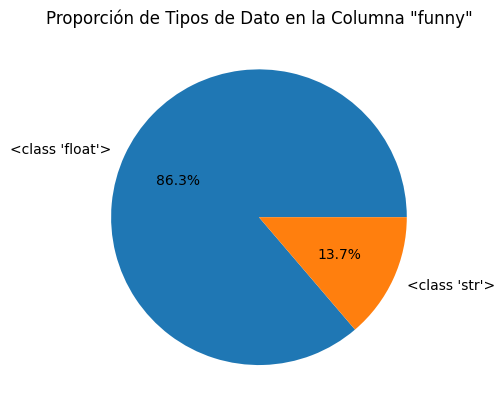

In [66]:
data_types_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Proporción de Tipos de Dato en la Columna "funny"')
plt.show()

Mientras que en el grafico de arriba podemos ver el porcentaje que representa cada tipo de dato, en el grafico de abajo podemos ver la cantidad para cada tipo y en donde los registros con una funny NaN mucho mayor influencia sobre la columna. 

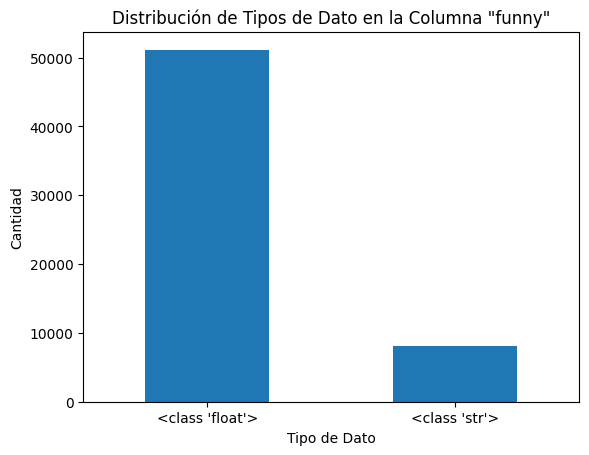

In [67]:

data_types_counts.plot(kind='bar')
plt.xlabel('Tipo de Dato')
plt.ylabel('Cantidad')
plt.title('Distribución de Tipos de Dato en la Columna "funny"')
plt.xticks(rotation=0)
plt.show()

Aqui podemos ver que los todos los valores de tipo float que son la mayoria son iguales eso quiere decir que de los 59305 datos de la columna funny 51154 son NaN y el restante son textos que aportan informacion. Debido a esto se puede llegar a desestimar la colunma funny por falta de relevancia de los datos no nulos que esta contiene. Aportan informacion pero son muy pocos.

In [68]:
# Obtén los diferentes valores de tipo 'float' y 'str' en la columna 'funny'
unique_float_values = reviews.loc[reviews['funny'].apply(type) == float, 'funny'].unique()
unique_str_values = reviews.loc[reviews['funny'].apply(type) == str, 'funny'].unique()

# Cuenta cuántos valores únicos hay de cada tipo
count_unique_float_values = len(unique_float_values)
count_unique_str_values = len(unique_str_values)

print(f'Valores únicos de tipo "float": {count_unique_float_values}')
print(f'Valores únicos de tipo "str": {count_unique_str_values}')

Valores únicos de tipo "float": 1
Valores únicos de tipo "str": 185


Aqui vemos la estructura de los datos del tipo str de la columna

In [69]:
# Filtra solo los valores de tipo 'str' en la columna 'funny'
str_values_funny = reviews.loc[reviews['funny'].apply(type) == str, 'funny']

# Muestra los valores 'str' únicos
unique_str_values = str_values_funny.unique()
print(unique_str_values)

['3 people found this review funny' '1 person found this review funny'
 '2 people found this review funny' '5 people found this review funny'
 '17 people found this review funny' '524 people found this review funny'
 '4 people found this review funny' '12 people found this review funny'
 '6 people found this review funny' '7 people found this review funny'
 '103 people found this review funny' '16 people found this review funny'
 '34 people found this review funny' '9 people found this review funny'
 '45 people found this review funny' '11 people found this review funny'
 '97 people found this review funny' '207 people found this review funny'
 '718 people found this review funny' '23 people found this review funny'
 '100 people found this review funny' '8 people found this review funny'
 '19 people found this review funny' '32 people found this review funny'
 '118 people found this review funny' '10 people found this review funny'
 '44 people found this review funny' '20 people found 

In [70]:
# Filtra los registros con valores de tipo 'str' en la columna 'funny'
reviews_with_str_funny = reviews[reviews['funny'].apply(type) == str]

# Muestra los registros filtrados
print(reviews_with_str_funny)

                 user_id                                           user_url  \
18             maplemage             http://steamcommunity.com/id/maplemage   
19             maplemage             http://steamcommunity.com/id/maplemage   
20             maplemage             http://steamcommunity.com/id/maplemage   
24                Wackky                http://steamcommunity.com/id/Wackky   
27     76561198079601835  http://steamcommunity.com/profiles/76561198079...   
...                  ...                                                ...   
59283       MeloncraftLP          http://steamcommunity.com/id/MeloncraftLP   
59284  76561198277602337  http://steamcommunity.com/profiles/76561198277...   
59292            sexyawp               http://steamcommunity.com/id/sexyawp   
59297  76561198310819422  http://steamcommunity.com/profiles/76561198310...   
59302        LydiaMorley           http://steamcommunity.com/id/LydiaMorley   

                                  funny     posted 

La columna recommend solo contiene datos del tipo boleano

In [71]:
# Contar la ocurrencia de cada tipo de dato en la columna 'recommend'
data_types_counts = reviews['recommend'].apply(type).value_counts()

print(data_types_counts)

recommend
<class 'bool'>    59305
Name: count, dtype: int64


In [72]:
recommend_counts = reviews['recommend'].value_counts()

# Imprime el resultado
print(f'Cantidad de registros con valor True (recomienda): {recommend_counts[True]}')
print(f'Cantidad de registros con valor False (no recomienda): {recommend_counts[False]}')

Cantidad de registros con valor True (recomienda): 52473
Cantidad de registros con valor False (no recomienda): 6832


Aqui podemos ver la distribucion de los datos de 'recommend' para cada valor y cuantos de cada uno

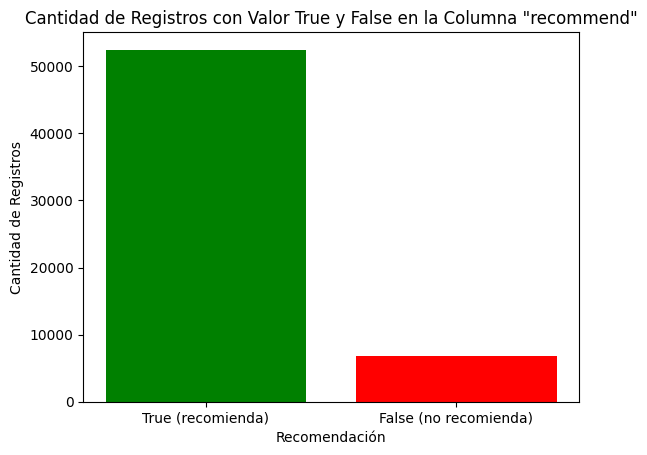

In [73]:

# Cantidad de registros con valor True y False
recommend_counts = reviews['recommend'].value_counts()

# Crear un gráfico de barras
plt.bar(['True (recomienda)', 'False (no recomienda)'], recommend_counts, color=['green', 'red'])
plt.xlabel('Recomendación')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros con Valor True y False en la Columna "recommend"')
plt.show()

Aqui vemos el porcentaje los que nos lleva a pensar que que la mayoria de las reviews se realizan con un buen sentimiento y con la intencion de recomendar el juego.

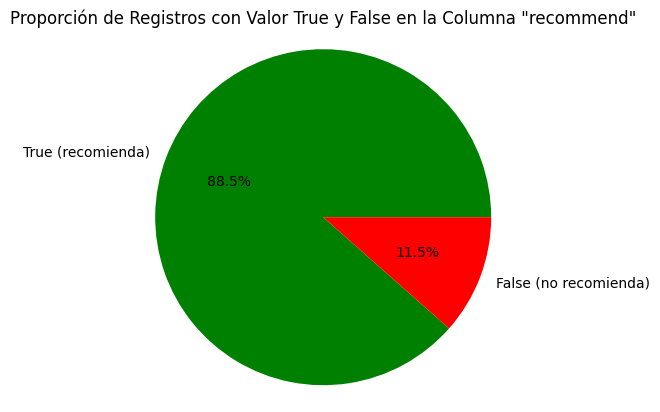

In [74]:
# Cantidad de registros con valor True y False
recommend_counts = reviews['recommend'].value_counts()

# Crear un gráfico de pastel
plt.pie(recommend_counts, labels=['True (recomienda)', 'False (no recomienda)'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Proporción de Registros con Valor True y False en la Columna "recommend"')
plt.axis('equal')  # Hace que el gráfico de pastel sea un círculo en lugar de una elipse
plt.show()

En la distrubucion de sentiment_score, podemos darnos cuenta que hay una concentracion importante de puntuaciones sobre el valor de 0.00 y si recordamos que el rango de -0.05 a 0.05 es para el valor de neutro podemos ver que un gran porcentaje de reviews son neutras en donde no de aprueba ni se desaprueba. 

In [75]:
sentiment_score_counts = reviews['sentiment_score'].value_counts()
print(sentiment_score_counts)

sentiment_score
 0.0000    11816
 0.4404     1393
 0.6369     1288
 0.6249     1116
 0.5106      648
           ...  
-0.8504        1
-0.8975        1
 0.4046        1
 0.2120        1
 0.8015        1
Name: count, Length: 7970, dtype: int64


En este grafico podemos ver que el rango para los scores desfavorables es amplio pero la mayoria de las reviews no se encuentran alli sino en los scores mas favorables y los que nos puede llevar a pensar que la mayoria de las review se generan precedidas de un sentimiento positivo hacia el producto lo que tiene mucha coherencia porque si el producto no me genera ninguna satisfaccion no me interesaria nisiquiera comentar. 

c:\Users\Gio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sentiment_score'>

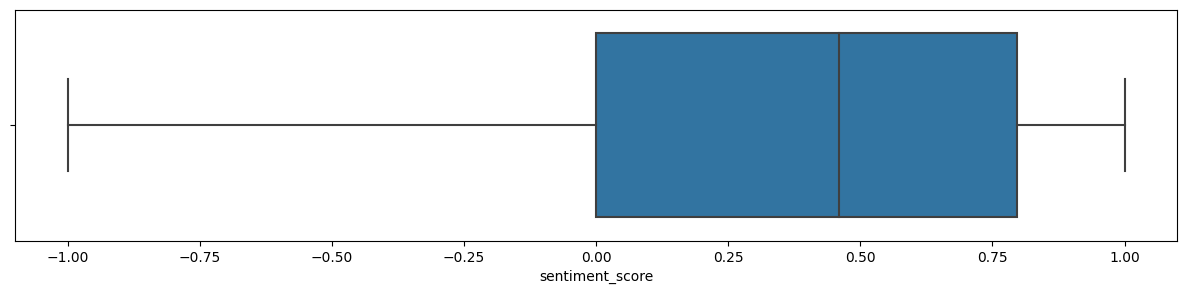

In [76]:
# grafico de 
plt.subplots(figsize=(15,3))
sns.boxplot(x= reviews[~reviews['sentiment_score'].isna()]['sentiment_score'])

En la columna Sentiment_analysis se encuentran tres categorias asi 0 = negativo, 1 = neutro, y 2 = positivo, estos categorias con conformadas segun el sentiment_score el cual es una variable continua y va desde -1 a 1 y para asignar la categoria se dividio en tres grupos asi -1 <= negativo < -0.05, -0.05 <= nuetro <= 0.05 y 0.05< positivo <= 1. Aqui podemos ver que la cantida de la cantidad de neutros y negativos son muy parecidas y la suma de los dos representa casi la tercera parte de los positivos

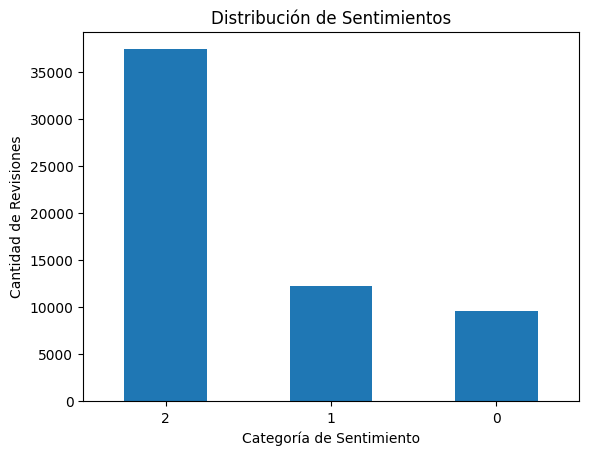

In [77]:
# Gráfico de barras (Bar Plot) para mostrar la cantidad de revisiones en cada categoría de sentimiento
sentiment_counts = reviews['sentiment_analysis'].value_counts()
sentiment_counts.plot(kind='bar', rot=0)
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Cantidad de Revisiones')
plt.title('Distribución de Sentimientos')
plt.show()

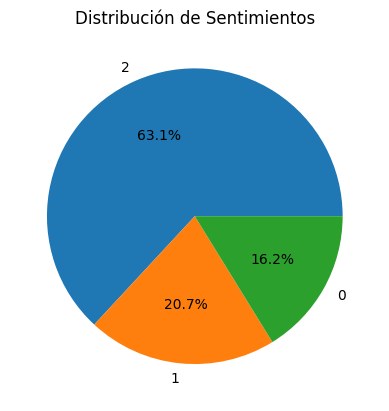

In [78]:
# Gráfico de pastel (Pie Chart) para mostrar la proporción de cada categoría de sentimiento
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribución de Sentimientos')
plt.show()

Aqui vemos que esta variable es unimodal pero esta sesgada a la derecha nuevamente mostrandonos que la mayoria de las comentarios ni aprueba ni desaprueban el juego.

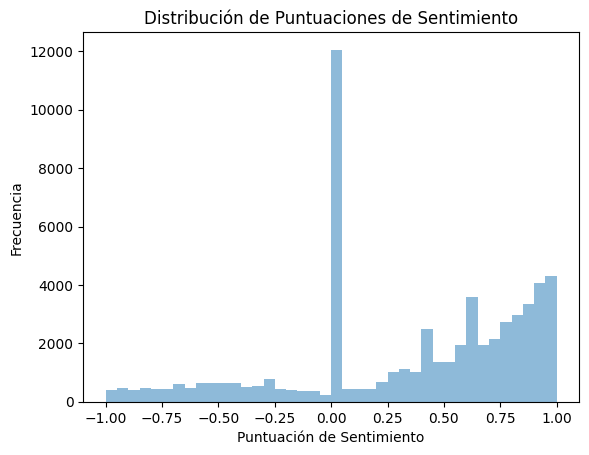

In [79]:
# Suponiendo que tu DataFrame se llama "reviews"
plt.hist(reviews['sentiment_score'], bins=40, alpha=0.5)
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.show()

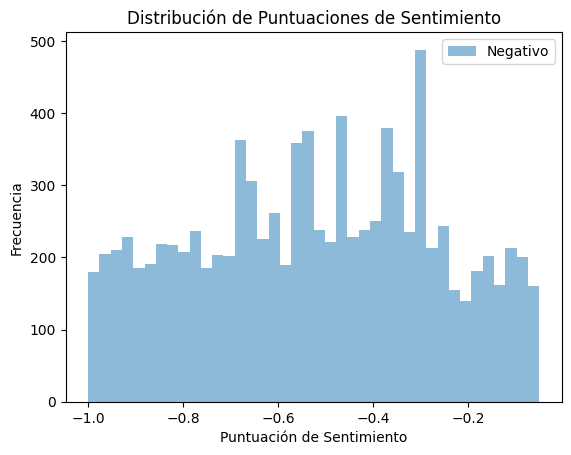

In [80]:
# Histograma para la categoría "Negativo" (sentimiento 0)
negativo_data = reviews[reviews['sentiment_analysis'] == 0]
plt.hist(negativo_data['sentiment_score'], bins=40, alpha=0.5, label='Negativo')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.legend()
plt.show()

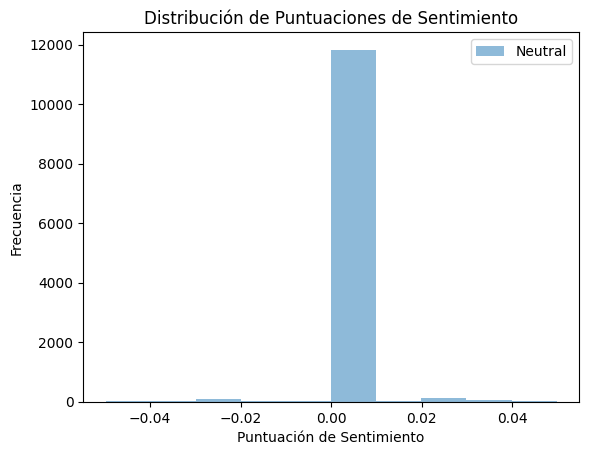

In [81]:
# Histograma para la categoría "Neutral" (sentimiento 1)
negativo_data = reviews[reviews['sentiment_analysis'] == 1]
plt.hist(negativo_data['sentiment_score'], bins=10, alpha=0.5, label='Neutral')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.legend()
plt.show()

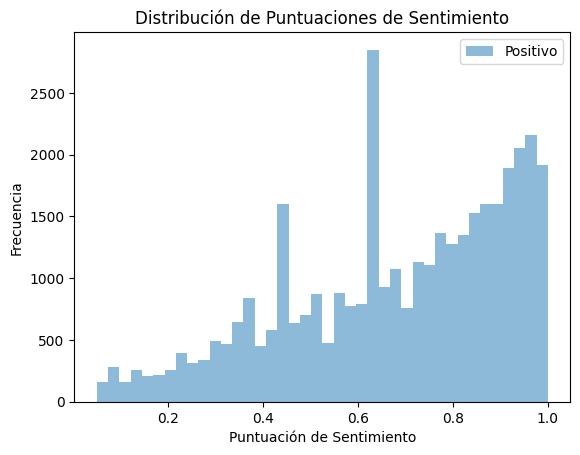

In [82]:
# Histograma para la categoría "Positivo" (sentimiento 2)
negativo_data = reviews[reviews['sentiment_analysis'] == 2]
plt.hist(negativo_data['sentiment_score'], bins=40, alpha=0.5, label='Positivo')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.legend()
plt.show()

c:\Users\Gio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


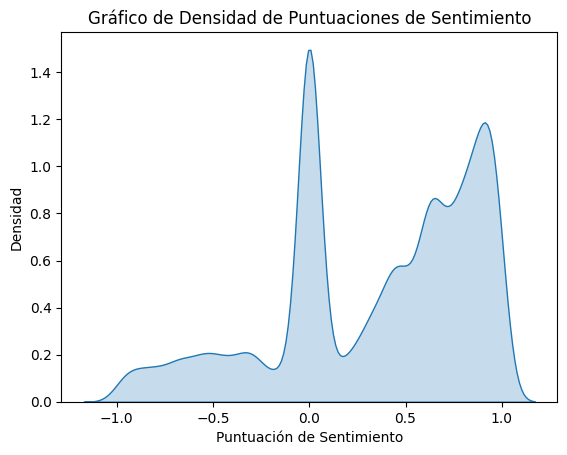

In [83]:
# Suponiendo que tu DataFrame se llama "reviews"
sns.kdeplot(reviews['sentiment_score'], fill=True)
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Puntuaciones de Sentimiento')
plt.show()


# Conclusiones del Análisis Exploratorio de Datos (EDA)

En este análisis exploratorio de datos, hemos examinado detalladamente los dataset games y reviews de la plataforma de juegos en linea steam. El objetivo de este EDA era comprender mejor la estructura y las características de los datos, así como identificar patrones y tendencias importantes. A continuación, se resumen las principales conclusiones y hallazgos obtenidos:

## Resumen General del Conjunto de Datos

El conjunto de datos contiene un total de 32133 registros en games y 59305 en reviews  observaciones y 15 variables.
Las variables incluidas en el conjunto de datos son ['publisher', 'genres', 'app_name', 'title', 'url', 'release_date', 'tags', 'reviews_url', 'specs', 'price', 'early_access', 'item_id', 'developer'].
Desde el principio se analizaron solo las variables que presentaban algun potencial que pudiera contribuir con el objetivo final de el proyecto que es crear un modelo de recomendacion en dase a gustos parecidos entre usuarios.


## Estadísticas Descriptivas

Se calcularon estadísticas descriptivas, como la media, la mediana, la desviación estándar y los percentiles, para las variables numéricas clave. Algunos de los hallazgos clave incluyen:
- Las estadisticas descriptivas que se pudieron obtener apartir del procesamento de las reviews con librerias de machine learnig, nos muestran que hay un gran porcentaje de la reviews tienden a ser positivas.


## Visualizaciones

Se crearon varias visualizaciones para explorar las relaciones y patrones en los datos. Algunos de los hallazgos visuales más destacados incluyen:
- La proporcion de las reviews que recomiendan un juego es mas o menos la sumatoria de las categorias bueno y neutro en la columna de sentiment_analysis.
- Al hacer el analisis de setimiento a las reviews con la libreria Nltk podemos observar al hacer un grafico de distribucion de sentimiento que la mayoria de las reviews se generan para expresar una buen sentimiento hacia el juego lo que es muy coherente porque si no se genera una buena percepcion es poco probanble que el usuario se anime a hacer una review. 


## Correlaciones

Debido a que el texto de la review expresa indirectamente si un usuario recomendaria un juego o no, la columna recommend esta fuertemente relacionada con la columna review.


## Conclusiones Generales

Se aprovechara las caracteristica boleana y la fuerte corealcion que tiene la columna recommend con la columna review para alimentar el sistema de recomendacion

Este análisis exploratorio de datos proporciona una sólida comprensión de los dataset games y reviews, en la propuesta se entrega un tercer dataset llamado items pero se decide no procesarlo debido a su gran volumen y a que para un sistema de recomendacion inicial que es el objetivo de este proyecto se puede realizar una buena aproximacion con los dos primeros datasets mencionados anteriormente los cuales nos servirán como base para futuros análisis y toma de decisiones relacionados con estos datos.

A medida que continuamos con el análisis y la interpretación de estos datos, es importante recordar que el EDA es un proceso iterativo y que se pueden realizar análisis más detallados en el futuro.